In [7]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
from matplotlib.patches import Rectangle
%matplotlib inline
fig_dir = "/Users/crankshaw/model-serving/clipper_paper/ModelServingPaper/nsdi_2017/fake-figs"


In [2]:
with open("quant_reg_learned_160826-221954_results.json", "r") as f:
    quantreg_results = json.load(f)
    
####### NOTE: This is with batching with a 95% backoff!!!    
# with open("quant_reg_aimd_160826-222354_results.json", "r") as f:
#     aimd_results = json.load(f)
#######

# NOTE: This is with batching with a 10% backoff
with open("quant_reg_aimd_160826-230417_results.json", "r") as f:
    aimd_results = json.load(f)
    

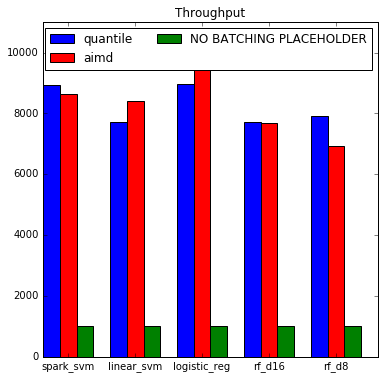

In [28]:
thrus = [(m["name"].split(":")[0], m["rate"]) for m in quantreg_results["meters"] if "model_thruput" in m["name"]]
names, rates = zip(*thrus)

fig, ax = plt.subplots(figsize=(6,6))
width = 1
ax.bar(np.arange(len(rates))*width*4,  rates, width=width, color="blue", label="quantile")
thrus = [(m["name"].split(":")[0], m["rate"]) for m in aimd_results["meters"] if "model_thruput" in m["name"]]
names, rates = zip(*thrus)
ax.bar(np.arange(len(rates))*width*4 + width,  rates, width=width, color="red", label="aimd")
ax.bar(np.arange(len(rates))*width*4 + width*2,  np.ones(len(rates))*1000, width=width, color="green", label="NO BATCHING PLACEHOLDER")

plt.xticks(np.arange(len(rates))*width*4 + width*1.5, names)
ax.set_ylim(0, 11000)
ax.legend(loc=0,ncol=2)
ax.set_title("Throughput")
plt.savefig("%s/batching_strategy_comp_thru.pdf" % (fig_dir), bbox_inches='tight')



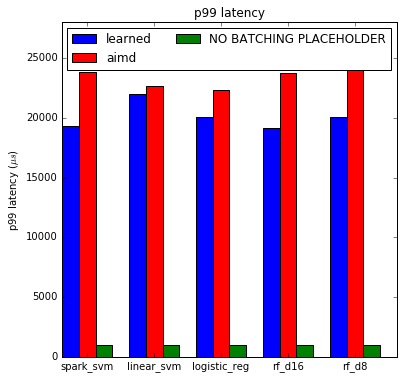

In [29]:
p99 = [(m["name"].split(":")[0], m["p99"]) for m in quantreg_results["histograms"] if "model_latency" in m["name"]]
names, lats = zip(*p99)
width = 1

fig, ax = plt.subplots(figsize=(6,6))
ax.bar(np.arange(len(names))*width*4,  lats, width=width, color="blue", label="learned")

p99 = [(m["name"].split(":")[0], m["p99"]) for m in aimd_results["histograms"] if "model_latency" in m["name"]]
names, lats = zip(*p99)
ax.bar(np.arange(len(names))*width*4 + width,  lats, width=width, color="red", label="aimd")
ax.bar(np.arange(len(names))*width*4 + width*2,  np.ones(len(lats))*1000, width=width, color="green", label="NO BATCHING PLACEHOLDER")
plt.xticks(np.arange(len(names))*width*4 + width*1.5, names)
ax.set_ylim(0, 28000)
ax.set_ylabel("p99 latency ($\mu s$)")
ax.legend(loc=0,ncol=2)
ax.set_title("p99 latency")
plt.savefig("%s/batching_strategy_comp_p99_lat.pdf" % (fig_dir), bbox_inches='tight')

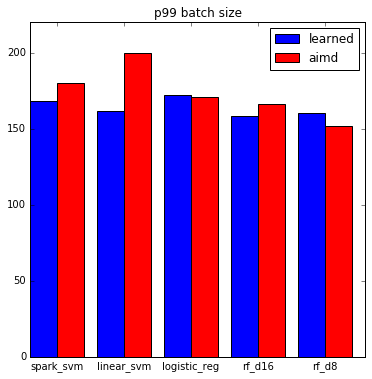

In [12]:
p99 = [(m["name"].split(":")[0], m["p99"]) for m in quantreg_results["histograms"] if "model_batch_size" in m["name"]]
names, lats = zip(*p99)

fig, ax = plt.subplots(figsize=(6,6))
ax.bar(np.arange(len(names))*5,  lats, width=2, color="blue", label="learned")

p99 = [(m["name"].split(":")[0], m["p99"]) for m in aimd_results["histograms"] if "model_batch_size" in m["name"]]
names, lats = zip(*p99)
ax.bar(np.arange(len(names))*5 + 2,  lats, width=2, color="red", label="aimd")
plt.xticks(np.arange(len(names))*5 + 2, names)
ax.set_ylim(0, 220)
ax.legend(loc=0)
ax.set_title("p99 batch size")

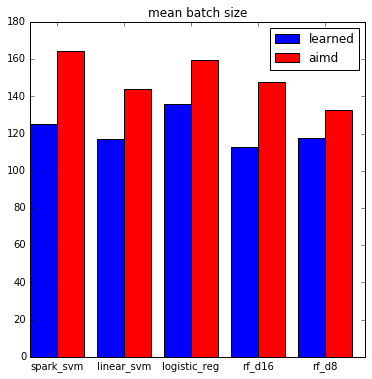

In [8]:
mean = [(m["name"].split(":")[0], m["mean"]) for m in quantreg_results["histograms"] if "model_batch_size" in m["name"]]
names, lats = zip(*mean)

fig, ax = plt.subplots(figsize=(6,6))
ax.bar(np.arange(len(names))*5,  lats, width=2, color="blue", label="learned")

mean = [(m["name"].split(":")[0], m["mean"]) for m in aimd_results["histograms"] if "model_batch_size" in m["name"]]
names, lats = zip(*mean)
ax.bar(np.arange(len(names))*5 + 2,  lats, width=2, color="red", label="aimd")
plt.xticks(np.arange(len(names))*5 + 2, names)
# ax.set_ylim(0, )
ax.legend(loc=0)
ax.set_title("mean batch size")